In [17]:
import numpy as np
import pandas as pd
import pickle

from generate_data import vectorize_all_responses
from dist_utils import plot_cluster_assignments

In [2]:
X, functions, goals = vectorize_all_responses()

In [12]:
fmax = functions.argmax(axis=1)

In [13]:
fm_X = np.array([X[:,:,:,i] for i in range(X.shape[3]) if goals[i] == 'find_max_last']).transpose(1,2,3,0)
fm_fmax = np.array([fmax[i] for i in range(len(fmax)) if goals[i] == 'find_max_last'])

In [16]:
ms_X = np.array([X[:,:,:,i] for i in range(X.shape[3]) if goals[i] == 'max_score_last']).transpose(1,2,3,0)
ms_fmax = np.array([fmax[i] for i in range(len(fmax)) if goals[i] == 'max_score_last'])

In [18]:
with open('../data_phase_ucb.pkl', 'rb') as f:
    trace = pickle.load(f)

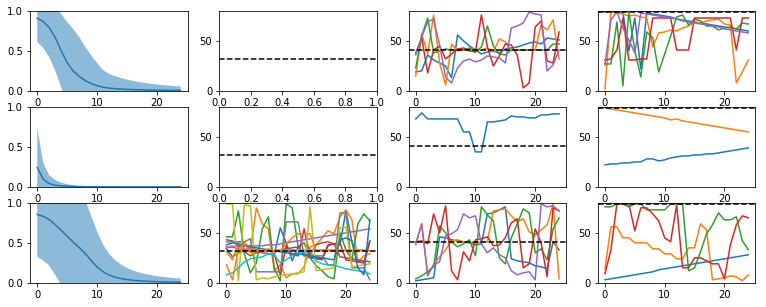

In [21]:
plot_cluster_assignments(trace, .1, fm_X, fm_fmax)

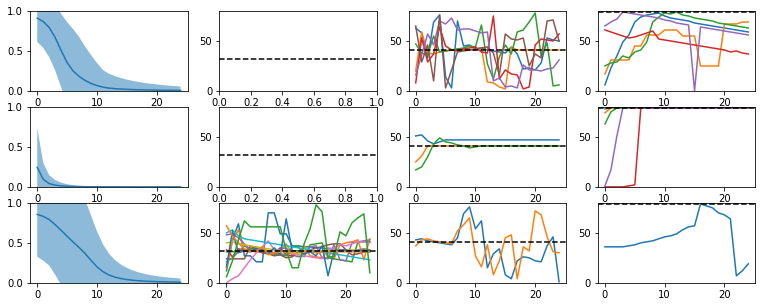

In [22]:
plot_cluster_assignments(trace, .1, ms_X, ms_fmax)